<a href="https://colab.research.google.com/github/RohitKumar23-11/computer-vision-binary-and-multiclass-classification/blob/main/03_introduction_to_computer_vision_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Convolutional Neural Networks and Computer Vision with TensorFlow

Computer vision is the practice of writing algorithms which can discover patterns in visual data. Such as the camera of a self-driving car recognizing the car in front.

## Get the data

The images we're working with are from the Food101 dataset (101 different classes of food): https://www.kaggle.com/dansbecker/food-101

However we've modified it to only use two classes (pizza 🍕 & steak) using the image data modification notebook: https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/image_data_modification.ipynb

> 🔑**Note:** We start with a smaller dataset so we can experiment quickly and figure what works (or better yet what doesn't work) before scaling up.

In [ ]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2023-07-05 05:19:38--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.128.128, 142.251.6.128, 108.177.112.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.128.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   268MB/s    in 0.4s    

2023-07-05 05:19:38 (268 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



## Inspect the data (become one with it)

A very crucial step at the beginning of any machine learning project is becoming one with the data.

And for a computer vision project... this usually means visualizing many smaples of your data.

In [ ]:
!ls pizza_steak

test  train


In [ ]:
!ls pizza_steak/train/

pizza  steak


In [ ]:
!ls pizza_steak/train/pizza/

1008104.jpg  1638227.jpg  2235981.jpg  2774899.jpg  3464027.jpg  576236.jpg
1008144.jpg  1646974.jpg  2236914.jpg  2775763.jpg  3464858.jpg  5764.jpg
1008844.jpg  1649108.jpg  2241448.jpg  2778214.jpg  3473991.jpg  579691.jpg
1008941.jpg  1649276.jpg  2247711.jpg  277963.jpg   3475936.jpg  593400.jpg
1011404.jpg  1652943.jpg  2253670.jpg  2785084.jpg  3478964.jpg  59445.jpg
102037.jpg   1654444.jpg  2255361.jpg  2793535.jpg  3479875.jpg  596494.jpg
1026922.jpg  1660415.jpg  2274117.jpg  27963.jpg    3479936.jpg  598381.jpg
1029698.jpg  1663749.jpg  2279642.jpg  2800325.jpg  3484590.jpg  604977.jpg
1033251.jpg  1665654.jpg  2280345.jpg  2811032.jpg  3493457.jpg  608085.jpg
1035854.jpg  166823.jpg   2285269.jpg  282013.jpg   349946.jpg	 618021.jpg
1038357.jpg  1670471.jpg  2285942.jpg  2821034.jpg  350358.jpg	 61822.jpg
1040878.jpg  1671531.jpg  228778.jpg   2821048.jpg  3505182.jpg  618348.jpg
1044524.jpg  1678284.jpg  2291093.jpg  2827938.jpg  3512070.jpg  625687.jpg
1044789.jpg  16810

In [ ]:
import os

# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.


In [ ]:
# Another way to find out how many images are in a file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))
num_steak_images_train

750

To visualize our images, first let's get the class names programmatically.

In [ ]:
# Get he classnames programmatically
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # Created a list of class_names from the subdirectories
print(class_names)

['pizza' 'steak']


In [ ]:
# Let's visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup the target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("Off");

  print(f"Image shape: {img.shape}") # Show the shape of the image

  return img

['1980167.jpg']
Image shape: (341, 512, 3)


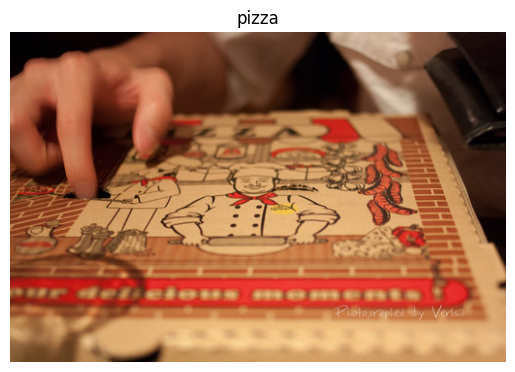

In [ ]:
# View a random image from the training dataset
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="pizza")

In [ ]:
# The images we've imported and plotted are actually giant arrays/tensors of different pixel values
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(341, 512, 3), dtype=uint8, numpy=
array([[[  2,   0,   3],
        [  2,   0,   3],
        [  2,   0,   3],
        ...,
        [ 49,  23,  24],
        [ 51,  22,  24],
        [ 50,  21,  23]],

       [[  2,   0,   3],
        [  2,   0,   3],
        [  2,   0,   3],
        ...,
        [ 40,  16,  16],
        [ 40,  16,  16],
        [ 40,  14,  15]],

       [[  2,   0,   3],
        [  2,   0,   3],
        [  2,   0,   3],
        ...,
        [ 34,  14,  13],
        [ 34,  13,  12],
        [ 34,  13,  12]],

       ...,

       [[130,  91,  52],
        [129,  90,  51],
        [128,  89,  50],
        ...,
        [201, 145,  94],
        [201, 145,  94],
        [201, 145,  94]],

       [[129,  90,  51],
        [128,  89,  50],
        [127,  88,  49],
        ...,
        [201, 146,  92],
        [200, 144,  93],
        [200, 144,  93]],

       [[128,  88,  52],
        [127,  87,  51],
        [127,  88,  49],
        ...,
        [202, 145,  9

In [ ]:
# View the image shape
img.shape # returns width, height, color channels

(341, 512, 3)

> 🔑 **Note:** As we've discussed before, many machine learning models, including neural networks prefer the values they work with to be between 0 and 1. Knowing this, one of the most common preprocessing steps for working with images is to **scale** (also referred to as **normalize**) their pixel values by dividing the image arrays by 255. (Since 255 is the maximum pixel value).

In [ ]:
# Get all the pixel values between 0 & 1
img/255

array([[[0.00784314, 0.        , 0.01176471],
        [0.00784314, 0.        , 0.01176471],
        [0.00784314, 0.        , 0.01176471],
        ...,
        [0.19215686, 0.09019608, 0.09411765],
        [0.2       , 0.08627451, 0.09411765],
        [0.19607843, 0.08235294, 0.09019608]],

       [[0.00784314, 0.        , 0.01176471],
        [0.00784314, 0.        , 0.01176471],
        [0.00784314, 0.        , 0.01176471],
        ...,
        [0.15686275, 0.0627451 , 0.0627451 ],
        [0.15686275, 0.0627451 , 0.0627451 ],
        [0.15686275, 0.05490196, 0.05882353]],

       [[0.00784314, 0.        , 0.01176471],
        [0.00784314, 0.        , 0.01176471],
        [0.00784314, 0.        , 0.01176471],
        ...,
        [0.13333333, 0.05490196, 0.05098039],
        [0.13333333, 0.05098039, 0.04705882],
        [0.13333333, 0.05098039, 0.04705882]],

       ...,

       [[0.50980392, 0.35686275, 0.20392157],
        [0.50588235, 0.35294118, 0.2       ],
        [0.50196078, 0

## An end-to-end example

Let's build a convolutional neural network to find patterns to find patterns in our image, more specifically we need a way to:

* Load our images
* Preprocess our images
* Build a CNN to find patterns in our images
* Compile our CNN
* Fit the CNN to our training data

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the seed
tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 0 and 1, also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup paths to our data directories
train_dir = "pizza_steak/train"
test_dir = "pizza_steak/test"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode = "binary",
                                               seed=42)

# Build a CNN model (same as the Tiny VGG on the CNN explainer website)
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile our CNN
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 32s 292ms/step - loss: 0.5622 - accuracy: 0.7067 - val_loss: 0.4019 - val_accuracy: 0.8340
Epoch 2/5
47/47 [==============================] - 11s 240ms/step - loss: 0.4262 - accuracy: 0.8167 - val_loss: 0.4051 - val_accuracy: 0.7920
Epoch 3/5
47/47 [==============================] - 10s 212ms/step - loss: 0.4035 - accuracy: 0.8207 - val_loss: 0.3559 - val_accuracy: 0.8480
Epoch 4/5
47/47 [==============================] - 11s 240ms/step - loss: 0.3671 - accuracy: 0.8507 - val_loss: 0.3556 - val_accuracy: 0.8560
Epoch 5/5
47/47 [==============================] - 11s 241ms/step - loss: 0.3124 - accuracy: 0.8660 - val_loss: 0.3453 - val_accuracy: 0.8320


> 🔑 **Note:** If the above cell is taking longer than ~`0 seconds per epoch, make sure you're using a GPU by going to Runtime->Change Runtime Type-> Hardware Accelator -> GPU (you may have to rerun some cell above).

In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

⚒ **Practice/excercise:** Go through the CNN explainer website for a minimum of 10-minutes and compare our neural network with thiers: https://poloclub.github.io/cnn-explainer/

## Using the same model as before

Let's replicate the model we've built in a previous section **Basic TensorFlow** to see if it works with our image data.

The model we've building is from the [TensorFlow-Playground](https://playground.tensorflow.org/#activation=relu&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.001&regularizationRate=0&noise=0&networkShape=4,4&seed=0.10109&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false).

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# Create a model to replicate to TensorFlow Playground model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 13s 229ms/step - loss: 0.6903 - accuracy: 0.5500 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 12s 258ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 10s 204ms/step - loss: 0.6933 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 10s 211ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 11s 225ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000


In [ ]:
# Get a summary of model_2
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


Despite having 20x more parameters our CNN (model_1), model_2 performs terribly... let's try to improve it.

In [ ]:
# Set random seet
tf.random.set_seed(42)

# Build the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(6, activation="relu"),
    tf.keras.layers.Dense(6, activation="relu"),
    tf.keras.layers.Dense(6, activation="relu"),
    tf.keras.layers.Dense(6, activation="relu"),
    tf.keras.layers.Dense(6, activation="relu"),
    tf.keras.layers.Dense(6, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 13s 228ms/step - loss: 0.8020 - accuracy: 0.5020 - val_loss: 0.6972 - val_accuracy: 0.4600
Epoch 2/5
47/47 [==============================] - 10s 215ms/step - loss: 0.6983 - accuracy: 0.4987 - val_loss: 0.6937 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 11s 226ms/step - loss: 0.6954 - accuracy: 0.4760 - val_loss: 0.6963 - val_accuracy: 0.4980
Epoch 4/5
47/47 [==============================] - 12s 259ms/step - loss: 0.6967 - accuracy: 0.4920 - val_loss: 0.6934 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 9s 202ms/step - loss: 0.7012 - accuracy: 0.4633 - val_loss: 0.7013 - val_accuracy: 0.5000


In [ ]:
# Get the summary of model_3
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 6)                 903174    
                                                                 
 dense_5 (Dense)             (None, 6)                 42        
                                                                 
 dense_6 (Dense)             (None, 6)                 42        
                                                                 
 dense_7 (Dense)             (None, 6)                 42        
                                                                 
 dense_8 (Dense)             (None, 6)                 42        
                                                                 
 dense_9 (Dense)             (None, 6)                

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# Create the model (same as above but let's step it up a notch)
model_4 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_4.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_4 = model_4.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 12s 207ms/step - loss: 2.6564 - accuracy: 0.6247 - val_loss: 0.8616 - val_accuracy: 0.6560
Epoch 2/5
47/47 [==============================] - 11s 231ms/step - loss: 0.6836 - accuracy: 0.7113 - val_loss: 0.5067 - val_accuracy: 0.7820
Epoch 3/5
47/47 [==============================] - 11s 229ms/step - loss: 0.7323 - accuracy: 0.7127 - val_loss: 0.8409 - val_accuracy: 0.6700
Epoch 4/5
47/47 [==============================] - 12s 263ms/step - loss: 0.6407 - accuracy: 0.7353 - val_loss: 0.6729 - val_accuracy: 0.6760
Epoch 5/5
47/47 [==============================] - 12s 261ms/step - loss: 0.5109 - accuracy: 0.7853 - val_loss: 0.4226 - val_accuracy: 0.7980


In [ ]:
# Get a summary of model_4
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 150528)            0         
                                                                 
 dense_11 (Dense)            (None, 100)               15052900  
                                                                 
 dense_12 (Dense)            (None, 100)               10100     
                                                                 
 dense_13 (Dense)            (None, 100)               10100     
                                                                 
 dense_14 (Dense)            (None, 1)                 101       
                                                                 
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# difference between model_1 and model_4 trainable parameters (it is around 500 times higher than conv2d but perform less)
15000000/31000

483.8709677419355

> 🔑**Note:** You can think of trainable parameters as **patterns a model can learn from data.** Intuitively, you might think more is better. And in lots of cases, it is. But in this case, the difference here is the two different styles of model we're using. Where a series of dense layers has a number of different learnable parameters connected to each other and hence a higher number of possible learnable patterns, **a convolutional neural network seeks to sort and learn the most important patterns in an image.** So even though these are less learnable parameters in our convolutional nerual network, these are often more helpful in dechiphering between different **features** in an image.

## Binary Classification: Let's break it down

1. Become one with the data (visualize, visualize, visalize)
2. Preprocess the data (prepared it for our model, the main step here was scaling/normalizing & turning our data into batches)
3. Create a model (start with a baseline)
4. Fit the model
5. Evaluate the model
6. Adjust different parameters and imporve the model (try to beat our baseline)
7. Repeat until satisfied (experiment, experiment, experiment)

### 1. Become one with data

['667075.jpg']
Image shape: (384, 512, 3)
['926046.jpg']
Image shape: (384, 512, 3)


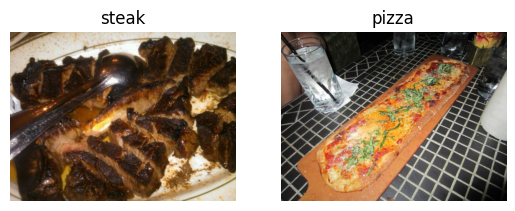

In [ ]:
# Visualize data
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1, 2, 2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")

### 2.  Preprocess the data (prepare it for a model)

In [ ]:
# Define directory dataset paths
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

Our next step is to turn our data into **batches**.

A batch is a small subset of data. Rather than look at all ~10,000 images at one time, a model might only look at 32 at a time.
It does this for a couple of reasones:
  1. 10,000 images (or more) might not fit into the memory of your processor (GPU).
  2. Trying to learn the patterns in 10,000 images in one hit could result in the model not being able to learn very well.

Why 32?

Because 32 is good for your health... https://twitter.com/ylecun/status/989610208497360896?s=20

In [ ]:
!nvidia-smi

Wed Jul  5 05:24:52 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   71C    P0    29W /  70W |   2955MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
# Create train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.) # tells when you load your images divide all its pixels values by 255
test_datagen = ImageDataGenerator(rescale=1/255.)

In [ ]:
# Load in our image data from directories and turn them into batches
train_data = train_datagen.flow_from_directory(directory=train_dir, # Target directory of images
                                               target_size=(224, 224), # Targer size of images (height, width)
                                               class_mode = "binary", # type of data you're working with
                                               batch_size=32) # Size of minibatches to load data into

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224, 224),
                                             class_mode= "binary",
                                             batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
# Get a sample of a train data batch
images, labels = train_data.next() # Get the "next" batch of images/labels in train_data
len(images), len(labels)

(32, 32)

In [ ]:
# How many batches are there?
len(train_data)

47

In [ ]:
# Get the first two images
images[:2], images[0].shape

(array([[[[0.69411767, 0.5686275 , 0.50980395],
          [0.69411767, 0.57254905, 0.5019608 ],
          [0.69411767, 0.58431375, 0.5019608 ],
          ...,
          [0.5294118 , 0.427451  , 0.29803923],
          [0.5294118 , 0.427451  , 0.28235295],
          [0.5294118 , 0.43137258, 0.27058825]],
 
         [[0.7058824 , 0.58431375, 0.5137255 ],
          [0.69803923, 0.5882353 , 0.5058824 ],
          [0.6862745 , 0.5764706 , 0.49411768],
          ...,
          [0.54509807, 0.4431373 , 0.3137255 ],
          [0.5294118 , 0.427451  , 0.2901961 ],
          [0.5294118 , 0.427451  , 0.28235295]],
 
         [[0.6862745 , 0.5764706 , 0.4901961 ],
          [0.68235296, 0.57254905, 0.48627454],
          [0.69411767, 0.58431375, 0.5019608 ],
          ...,
          [0.5568628 , 0.45098042, 0.33333334],
          [0.5411765 , 0.43529415, 0.31764707],
          [0.5411765 , 0.43921572, 0.30980393]],
 
         ...,
 
         [[0.7725491 , 0.56078434, 0.41176474],
          [0.76862

In [ ]:
# View the first batch labels
labels

array([1., 1., 0., 1., 1., 1., 0., 1., 0., 1., 1., 0., 1., 1., 0., 0., 1.,
       0., 0., 1., 1., 1., 0., 0., 1., 0., 1., 1., 0., 0., 1., 1.],
      dtype=float32)

### 3. Create a CNN model (start with a baseline)

A baseline is a relaively simple model or existing result that you setup when beginning a machine learning experiment and then as you keep experimenting, you try to beat the baseline model.
> 🔑 **Note:** In deep learning, there is almost an infinite amount of architectures you could create. So one of the best ways to get started is to start with something simple and see if it works on you data and then introduce complexity as required (e.g., look at which current model is performing best in field for your problem).

In [ ]:
# Make the creating of our model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [ ]:
# Create the model (this will be our baseline, a layer convolutional neural network)

model_5 = Sequential([
    Conv2D(filters=10, # Filters is the number of sliding windows going across an input (higher = more complex model)
           kernel_size=3, # The size of the sliding window going across an input
           strides=1,  # the size of the step the sliding window takes across an input
           padding="valid", #If "same", output shape is same as input, if "valid", output shape gets compressed
           activation="relu",
           input_shape=(224, 224, 3)), # Input layer (Specify input shape)
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    Flatten(),
    Dense(1, activation="sigmoid") # Output layer (working with binary classification so only 1 output neuron)
])

⚒ **Practice:** Understand what's going on in a Conv2D layer by going through the CNN explainer website for 10-20 minutes:
https://poloclub.github.io/cnn-explainer/

In [ ]:
# Compile the model
model_5.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [ ]:
# Get a summary of our model
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_4 (Flatten)         (None, 475240)            0         
                                                                 
 dense_15 (Dense)            (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


### 4. Fit the model

In [ ]:
# Check the lengths of training and test data generators
len(train_data), len(test_data)

(47, 16)

In [ ]:
from keras.callbacks import TensorBoard
# Fit the model
history_5 = model_5.fit(train_data, # this is a combination of labels and sample data
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data)
                        )#callbacks=[tensorboard_callbacks]

Epoch 1/5
47/47 [==============================] - 17s 282ms/step - loss: 0.9528 - accuracy: 0.6820 - val_loss: 0.4604 - val_accuracy: 0.8000
Epoch 2/5
47/47 [==============================] - 13s 274ms/step - loss: 0.4344 - accuracy: 0.8067 - val_loss: 0.4077 - val_accuracy: 0.8060
Epoch 3/5
47/47 [==============================] - 13s 273ms/step - loss: 0.3202 - accuracy: 0.8753 - val_loss: 0.3691 - val_accuracy: 0.8460
Epoch 4/5
47/47 [==============================] - 13s 277ms/step - loss: 0.1933 - accuracy: 0.9320 - val_loss: 0.4183 - val_accuracy: 0.8100
Epoch 5/5
47/47 [==============================] - 13s 276ms/step - loss: 0.0993 - accuracy: 0.9740 - val_loss: 0.4920 - val_accuracy: 0.7980


In [ ]:
model_1.evaluate(test_data)

16/16 [==============================] - 3s 152ms/step - loss: 0.3453 - accuracy: 0.8320


[0.3453436493873596, 0.8320000171661377]

In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

### 5. Evaluating our model

It looks like our model is learning something let's evaluate it.

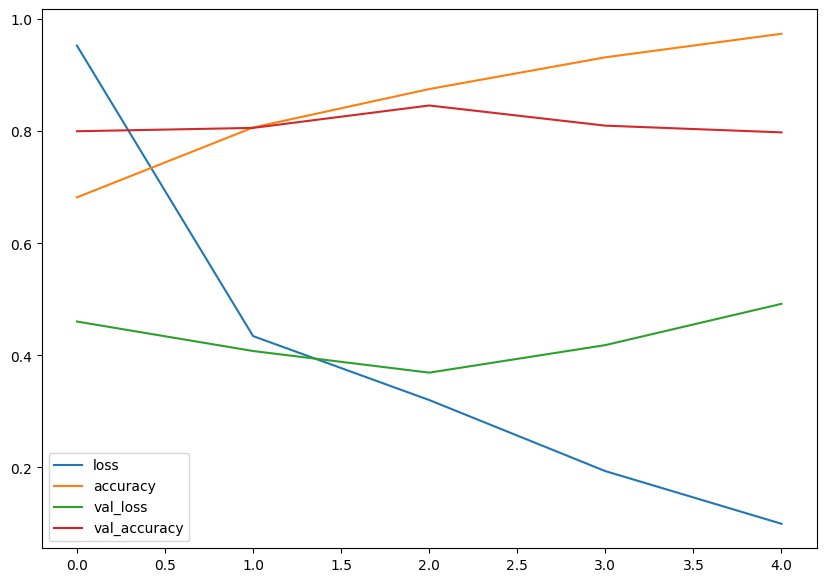

In [ ]:
# Let's plot the training curve
import pandas as pd
pd.DataFrame(history_5.history).plot(figsize=(10, 7));

In [ ]:
# Plot the validation and training curves sepraretely
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"])) # How many epochs did we run for?

  # Plot loss
  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label="training_accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()

> 🔑 **Note:** When a model's **validation loss starts to increase**, it's likely that the model is **overfitting** the training dataset. This means, it's learning the patterns in the training dataset *too well*  and thus the model's ability to generalize to unseen data will be diminished.

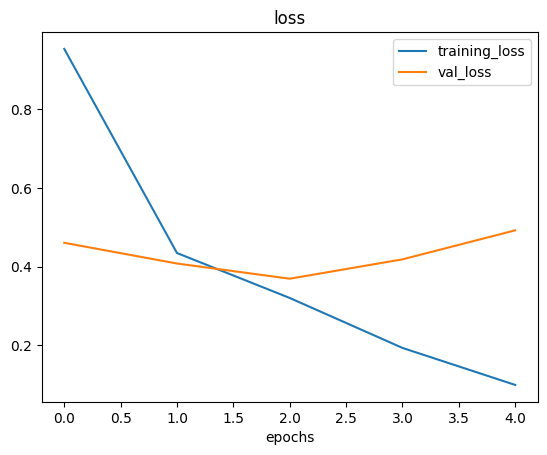

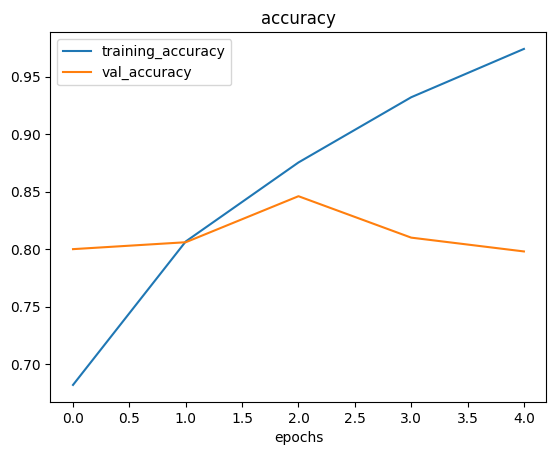

In [ ]:
# Check out the loss and accuracy of model_5
plot_loss_curves(history_5)

> 🔑 **Note:** Ideally the two loss curves (training and validation) will be very similar to each other (training loss and validation loss decreasing at similar rates), when there are large differences your model may be **overfitting**.

### Adjust the model parameters

Fitting a machine learning model comes in 3 steps:

0. Create a baseline
1. Beat the baseline by overfitting a larger model
2. Reduce overfitting

Ways to induce overfitting:

* Increase the number of conv layers
* Increase the number of conv filters
* Add another dense layer to the output of our flattened layer

Reduce overfitting:

* Add data augmentation
* Add regularization layers (such as MaxPool2D)
* Add more data...

> 🔑 **Note:** Reducing overfitting is also known as regularization.

In [ ]:
# Create the model  (this is going to be our new baseline)

model_6 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

In [ ]:
# Compile the model
model_6.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [ ]:
# Fit the model
history_6 = model_6.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 13s 244ms/step - loss: 0.5825 - accuracy: 0.6947 - val_loss: 0.4642 - val_accuracy: 0.7980
Epoch 2/5
47/47 [==============================] - 11s 235ms/step - loss: 0.4780 - accuracy: 0.7760 - val_loss: 0.4376 - val_accuracy: 0.7860
Epoch 3/5
47/47 [==============================] - 10s 220ms/step - loss: 0.4336 - accuracy: 0.8127 - val_loss: 0.3755 - val_accuracy: 0.8480
Epoch 4/5
47/47 [==============================] - 11s 233ms/step - loss: 0.4032 - accuracy: 0.8247 - val_loss: 0.3644 - val_accuracy: 0.8480
Epoch 5/5
47/47 [==============================] - 11s 233ms/step - loss: 0.3968 - accuracy: 0.8247 - val_loss: 0.3459 - val_accuracy: 0.8700


In [ ]:
# Get a summary of our model with max pooling
model_6.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 26, 26, 10)      

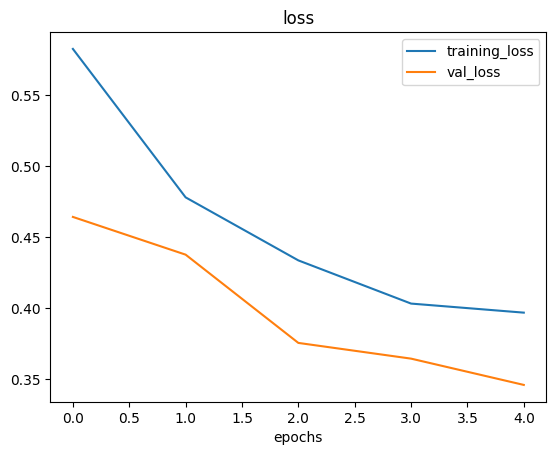

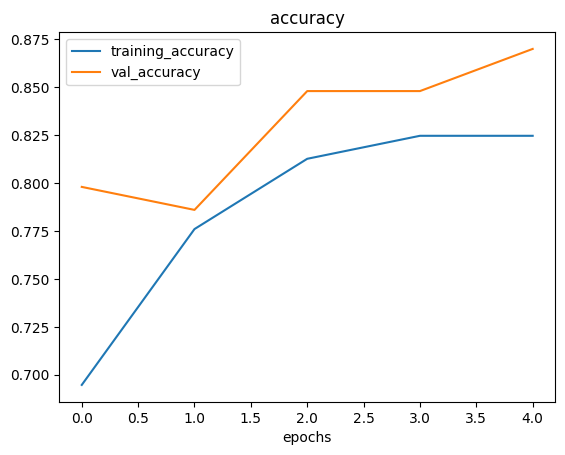

In [ ]:
# Plot loss curves
plot_loss_curves(history_6)

### Opening our bag of tricks and finding data augmentation

In [ ]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2, # how much do you want to rotate an image?
                                             shear_range=0.2, # how much do you wan to shear the image
                                             zoom_range=0.2, # Zoom-in randomly on an image
                                             width_shift_range=0.2, # move your image around on the x-axis
                                             height_shift_range=0.2, # move your image around on the y-axis
                                             horizontal_flip=True) # do you want to flip an image?

# Create ImageDataGenerator without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)

# Create ImageDataGenerator without data augmentation for the test dataset.
test_datagen_augmented = ImageDataGenerator(rescale=1/255.)

> 🤔 **Question:** What is data augmentation?

Data augmentation is the process of altering our training data, leading it to have more diversity and in turn allowing our models to learn more generalizable (hopefully) patterns. Altering might mean adjusting the rotation of an image, flipping it, cropping it or something similar.

Let's write some code to visualize data augmentation...

In [ ]:
# Import data and augment it from training directory
print("Augmented training data")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode="binary",
                                                                   shuffle=False) # for demonstration purposes only

# Create non-augmented train data batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode="binary",
                                               shuffle=False)

IMG_SIZE = (224, 224)
# Created non-augmented test data batches
print("Non-augmented test data:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=IMG_SIZE,
                                             batch_size=32,
                                             class_mode="binary")

Augmented training data
Found 1500 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.
Non-augmented test data:
Found 500 images belonging to 2 classes.


> 🔑 **Note:** Data augmentation is usually only performed on the training data. Using `ImageDataGenerator` buit-in data augmentation parameters our images are left as they are in the directories but are modified as they're loaded into the model.

Finally... let's visualize some augmented data!!!

In [ ]:
# Get sample data batches
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next() # note: labels aren't augmented... only data (images)

showin image number: 14


(-0.5, 223.5, 223.5, -0.5)

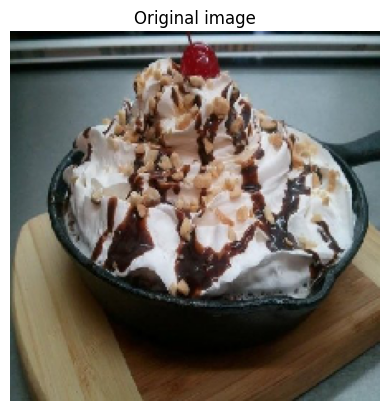

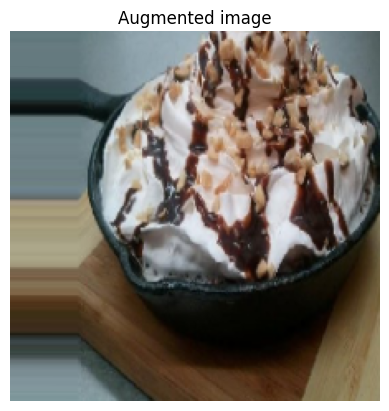

In [ ]:
# Show original image and augmented image
import random
random_number = random.randint(0, 32) # Our batch sizes are 32...
print(f"showin image number: {random_number}")
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False)

Other options are also available in data augmentation such as cropping, replacing, shearing.


Now we've seen what augmented data looks like, let's build a model and see how it learns on augmented data.

In [ ]:

model_7 = Sequential([
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

# Compile the model
model_7.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

# Fit the model
history_7 = model_7.fit(train_data_augmented, # Fitting model_7 on augmented training data
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 27s 543ms/step - loss: 0.7088 - accuracy: 0.4473 - val_loss: 0.6789 - val_accuracy: 0.6980
Epoch 2/5
47/47 [==============================] - 25s 538ms/step - loss: 0.6844 - accuracy: 0.6373 - val_loss: 0.6685 - val_accuracy: 0.5060
Epoch 3/5
47/47 [==============================] - 24s 517ms/step - loss: 0.6666 - accuracy: 0.6060 - val_loss: 0.6090 - val_accuracy: 0.6740
Epoch 4/5
47/47 [==============================] - 26s 548ms/step - loss: 0.8250 - accuracy: 0.5493 - val_loss: 0.6597 - val_accuracy: 0.6560
Epoch 5/5
47/47 [==============================] - 26s 544ms/step - loss: 0.7017 - accuracy: 0.6120 - val_loss: 0.6565 - val_accuracy: 0.6080


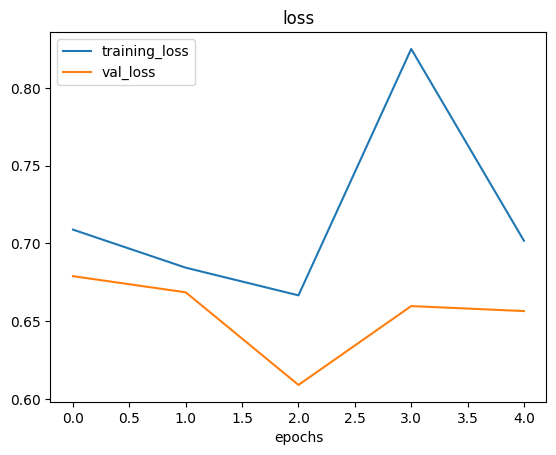

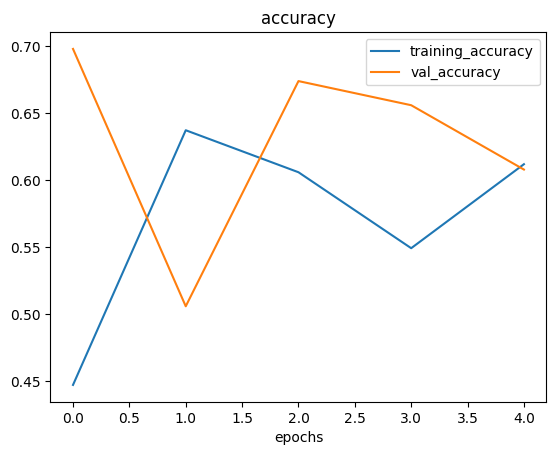

In [ ]:
# Check our models training curves
plot_loss_curves(history_7)

Let's shuffle our augmented training data and train another model (the same as before) on it and see that happens.

In [ ]:
# Import data and augment it and shuffle from training directory
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                           target_size=(224, 224),
                                                                           class_mode="binary",
                                                                           batch_size=32,
                                                                           shuffle=True) # Shuffle data this time

Found 1500 images belonging to 2 classes.


In [ ]:
# Create the model (same as model_6 and model_7)
model_8= Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

# Compile the model
model_8.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

# Fit the model
history_8 = model_8.fit(train_data_augmented_shuffled, # we're fitting on augmented and shuffled data
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 28s 531ms/step - loss: 0.6443 - accuracy: 0.6367 - val_loss: 0.4836 - val_accuracy: 0.7860
Epoch 2/5
47/47 [==============================] - 24s 507ms/step - loss: 0.5539 - accuracy: 0.7280 - val_loss: 0.4175 - val_accuracy: 0.8120
Epoch 3/5
47/47 [==============================] - 26s 546ms/step - loss: 0.5264 - accuracy: 0.7500 - val_loss: 0.3883 - val_accuracy: 0.8620
Epoch 4/5
47/47 [==============================] - 26s 545ms/step - loss: 0.4652 - accuracy: 0.7947 - val_loss: 0.3692 - val_accuracy: 0.8460
Epoch 5/5
47/47 [==============================] - 25s 544ms/step - loss: 0.4575 - accuracy: 0.7840 - val_loss: 0.3302 - val_accuracy: 0.8720


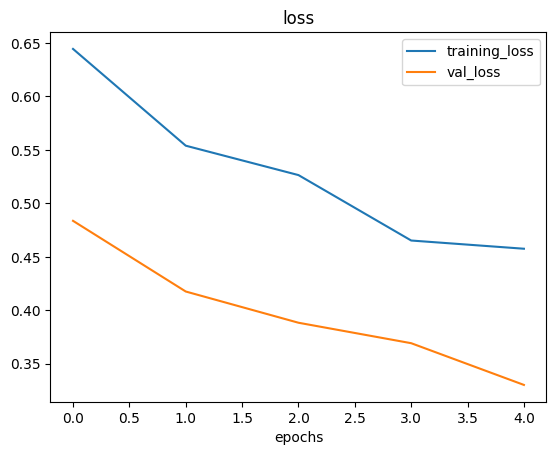

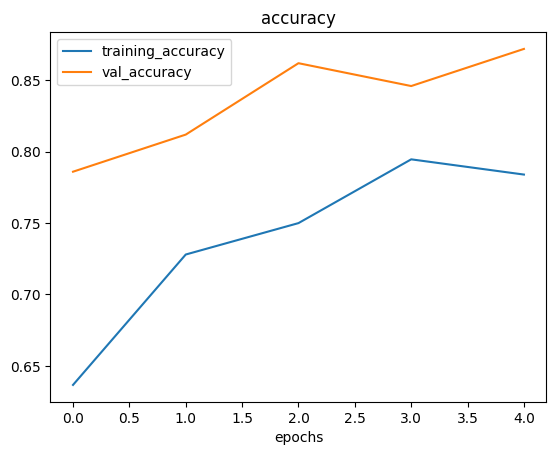

In [ ]:

# Plot loss curves
plot_loss_curves(history_8)

> 🔑 **Note:** When shuffling training data, the model get exposed to all different kinds of data during training, thus enabling it to learn features across a wide array of images (in our case, pizza and steak at the same time instead of just pizza and then steak).

### 7. Repeat until satisfied

Since we've already beaten our baseline, there are a few things we could try to contiune to improve our model:

* Increase the number of model layers (e.g., add more `Conv2D`/`MaxPool2D` layers)
* Increase the number of filters in each convolutional layer (e.g., from 10 to 32 or even 64)
* Train for longer (more epochs)
* Find an ideal learning rate
* Get more data (give the model more opportunities to learn)
* Use **transfer learning** to leverage what another iamge model has learn and adjust it for our own use case

> ⚒ **Practice:** Recreate the model on the CNN explainer website (same as `model_1`) and see how it performs on the augmented shuffled training data.

In [ ]:
# Build the model
model_9 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

# Compile the model
model_9.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

# Fit the model
history_9 = model_9.fit(train_data_augmented_shuffled,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 28s 556ms/step - loss: 0.6971 - accuracy: 0.5053 - val_loss: 0.6891 - val_accuracy: 0.5640
Epoch 2/5
47/47 [==============================] - 26s 555ms/step - loss: 0.6554 - accuracy: 0.5880 - val_loss: 0.5538 - val_accuracy: 0.6780
Epoch 3/5
47/47 [==============================] - 26s 552ms/step - loss: 0.5687 - accuracy: 0.7113 - val_loss: 0.4536 - val_accuracy: 0.8060
Epoch 4/5
47/47 [==============================] - 26s 554ms/step - loss: 0.5344 - accuracy: 0.7480 - val_loss: 0.4356 - val_accuracy: 0.8200
Epoch 5/5
47/47 [==============================] - 26s 551ms/step - loss: 0.5452 - accuracy: 0.7387 - val_loss: 0.4272 - val_accuracy: 0.8300


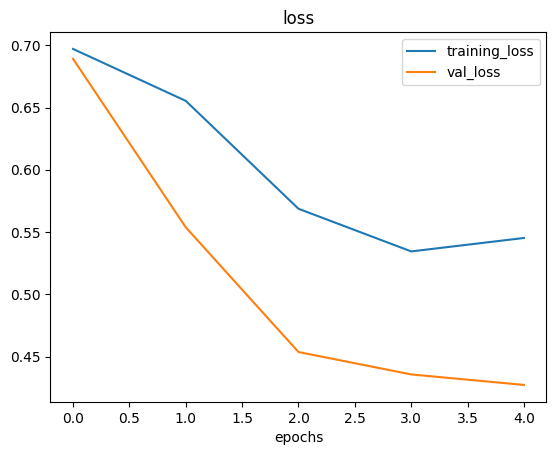

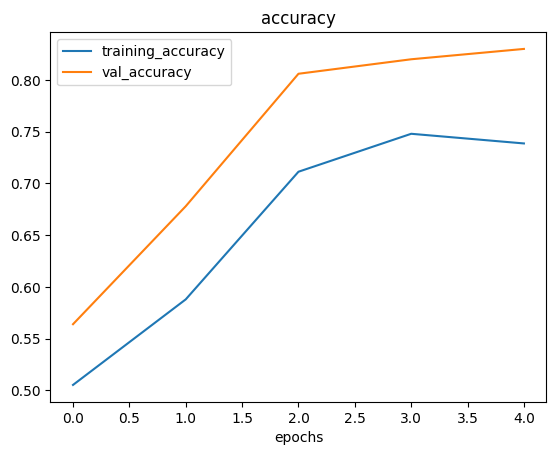

In [ ]:
# Plot loss curves
plot_loss_curves(history_9)

## Making a prediction with our trained model on our own custom data

In [ ]:
# Classes we're working with
print(class_names)

['pizza' 'steak']


--2023-07-05 05:34:55--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.06s   

2023-07-05 05:34:55 (32.3 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



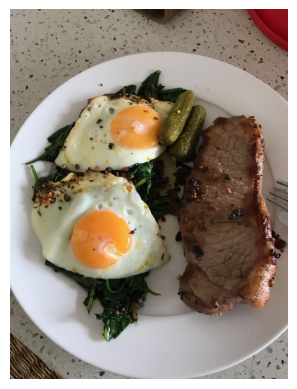

In [ ]:
# View our example image
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False);

In [ ]:
# Check the shape of our image
steak.shape

(4032, 3024, 3)

> 🔑 **Note:** When you train a neural network and you want to make a prediction with it on your own custom data, it's important than your custom data (or new data) is preprocessed into the same format as the data your model was trained on.

In [ ]:
# Create a function to import an image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into tensor and reshape it to
  (img_shape, img_shape, color_channels).
  """
  # Read in the image
  img = tf.io.read_file(filename)
  # Decode the read file into a tensor
  img = tf.image.decode_image(img)
  # Resize the image
  img = tf.image.resize(img, size=[img_shape, img_shape])
  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img

In [ ]:
# Load in and preprocess our custom image
steak = load_and_prep_image("03-steak.jpeg")
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [ ]:
pred = model_8.predict(tf.expand_dims(steak, axis=0))
pred

1/1 [==============================] - 0s 33ms/step


array([[0.8499862]], dtype=float32)

Looks like our custom image is being put through our model, however, it currently outputs a prediction probability, wouldn't it be nice if we could visualize the image as well as the model's prediction?

In [ ]:
# Remind ourselves of our class names
class_names

array(['pizza', 'steak'], dtype='<U5')

In [ ]:
# We can index the predicted class by rounding the prediction probability and indexing it on the class names
pred_class = class_names[int(tf.round(pred))]
pred_class

'steak'

In [ ]:
def pred_and_plot(model, filename, class_names=class_names):
  """
  Imports an image located at filename, makes a prediction with model
  and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  pred_class = class_names[int(tf.round(pred))]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

1/1 [==============================] - 0s 20ms/step


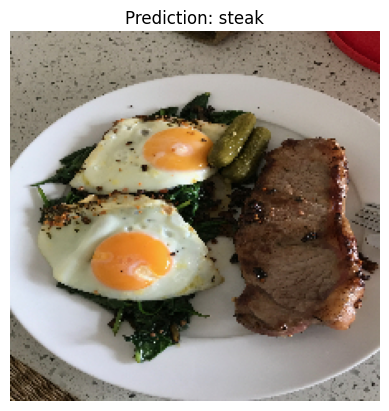

In [ ]:
# Test our model on a custom image
pred_and_plot(model_8, "03-steak.jpeg")

Our model works! Let's try it on another image... this time pizza 🍕

--2023-07-05 05:51:11--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg   100%[===================>]   2.74M  --.-KB/s    in 0.06s   

2023-07-05 05:51:11 (42.8 MB/s) - ‘03-pizza-dad.jpeg’ saved [2874848/2874848]

1/1 [==============================] - 0s 29ms/step


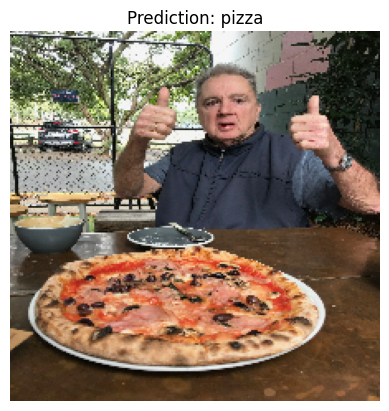

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
pred_and_plot(model_8, "03-pizza-dad.jpeg")

# Multi-class Image Classification

We've just been through a bunch of the following steps with a binary classification problem (pizza vs. steak), now we're going to step things up a notch with 10 classes of food (multi-class classification).

1. Become one with the data
2. Preprocess the data (get it ready for a model)
3. Create a model (start with a baseline)
4. Fit the model (overfit it to make sure it works)
5. Evaluate the model
6. Adjust different hyperparameters and impore the model (try to beat baseline/reduce overfitting)
7. Repeat until satisfied


## 1. Import and become one with the data

In [ ]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

# Unzip our data
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2023-07-05 06:01:04--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.69.128, 173.194.193.128, 173.194.194.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.69.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   126MB/s    in 3.6s    

2023-07-05 06:01:08 (136 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [ ]:
import os

# Walk through 10 classes of food image data
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/train'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/steak'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ice_cream'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ramen'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/hamburger'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/grilled_salmon'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/sushi'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/fried_rice'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_curry'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_wings'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/pizza'.

In [ ]:
!ls -la 10_food_classes_all/data

ls: cannot access '10_food_classes_all/data': No such file or directory


In [ ]:
# Setup the train and test directories
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [ ]:
# Let's get the class names
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


['416279.jpg']
Image shape: (383, 512, 3)


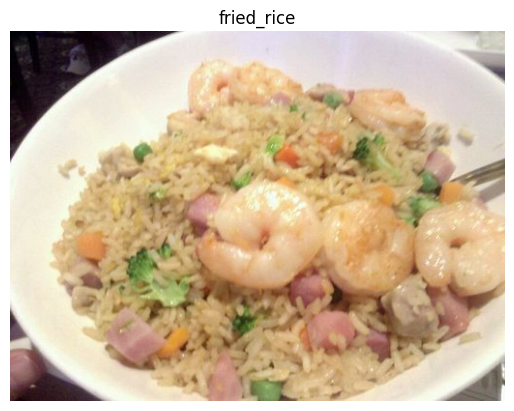

In [ ]:
# Visualize, visualize, visualize
import random
img = view_random_image(target_dir=train_dir,
                        target_class=random.choice(class_names))

### 2. Preprocess the data (prepare it for a model)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescale
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

# Load data in from directories and turn in into batchs
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode="categorical")

test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode="categorical")

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


### 3. Create a model (start with a baseline)

We've been talking a lot about the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/)
how about we just take their model (also on 10 classes) and use it for our problem..?

In [ ]:
# Make the creating of our model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [ ]:
# Create a model (similar to CNN Explainer)
model_10 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation="softmax") # Changed to have 10 output neurons and use of softmax activation function
])

model_10.compile(loss="categorical_crossentropy",
                 optimizer=Adam(),
                 metrics=["accuracy"])


### 4. Fit a model

In [ ]:
# Fit the model
history_10 = model_10.fit(train_data, # now 10 different classes
                          epochs=5,
                          steps_per_epoch=len(train_data),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 60s 238ms/step - loss: 2.0707 - accuracy: 0.2545 - val_loss: 1.9549 - val_accuracy: 0.3072
Epoch 2/5
235/235 [==============================] - 53s 227ms/step - loss: 1.8428 - accuracy: 0.3596 - val_loss: 1.8652 - val_accuracy: 0.3408
Epoch 3/5
235/235 [==============================] - 62s 264ms/step - loss: 1.4647 - accuracy: 0.5089 - val_loss: 1.9807 - val_accuracy: 0.3340
Epoch 4/5
235/235 [==============================] - 55s 232ms/step - loss: 0.8460 - accuracy: 0.7269 - val_loss: 2.4540 - val_accuracy: 0.3188
Epoch 5/5
235/235 [==============================] - 55s 234ms/step - loss: 0.3278 - accuracy: 0.8957 - val_loss: 3.8863 - val_accuracy: 0.2768


### 5. Evaluate the model

In [ ]:
# Evalute on the test data
model_10.evaluate(test_data)

79/79 [==============================] - 14s 170ms/step - loss: 3.8863 - accuracy: 0.2768


[3.88631010055542, 0.2768000066280365]

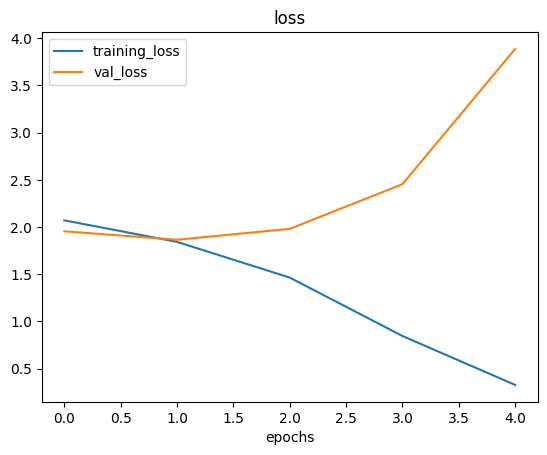

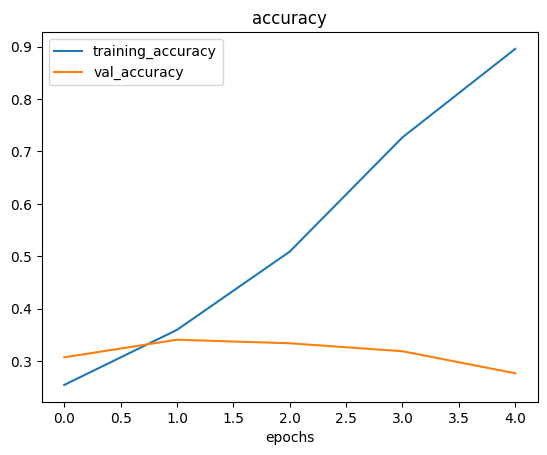

In [ ]:
# Check out the model's loss curves on the 10 classes
plot_loss_curves(history_10)

What do these loss curves tell us?

Well... it seems our model is **overfitting** the trianing set quite badly... in other words, it's getting great results on the training data but fails to generalize well to unseen data and performs poorly on the test dataset.

### 6. Adjust the model hyperparameter (to beat the baseline/reduce ovefitting)

Due to its performance on the training data, it's clear our model is learning something...

However, it's not generalizing well to unseen data (overfitting).

So, let's try to fix overfitting by...

* **Get more data** - having more data gives a model more opportunity to learn diverse patterns...

* **Simplify the model** - if our current model is overfitting the data, it may be too complicated of a model, one way to simplify a model is to: reduce # of layers or reduce # hidden units in layers

* **Use data augmentation** - data augmentation manipulates the training data in such a way to add more diversity to it (without altering the original data).
* **Use transfer learning** - transfer learning leverage the patterns another model has learned on similar data to your own and allow you to use those patterns on your own dataset.

In [ ]:
# How about we try and simplify the model first?
# Let's try to remove 2 Convolutional layers....

model_11 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation="softmax")
])

model_11.compile(loss="categorical_crossentropy",
                 optimizer=Adam(),
                 metrics=["accuracy"])

history_11 = model_11.fit(train_data,
                          epochs=5,
                          steps_per_epoch=len(train_data),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 55s 222ms/step - loss: 2.1682 - accuracy: 0.2191 - val_loss: 2.0147 - val_accuracy: 0.3016
Epoch 2/5
235/235 [==============================] - 57s 241ms/step - loss: 1.8322 - accuracy: 0.3797 - val_loss: 1.9721 - val_accuracy: 0.3128
Epoch 3/5
235/235 [==============================] - 64s 272ms/step - loss: 1.3848 - accuracy: 0.5505 - val_loss: 2.1071 - val_accuracy: 0.2992
Epoch 4/5
235/235 [==============================] - 59s 252ms/step - loss: 0.8372 - accuracy: 0.7457 - val_loss: 2.4543 - val_accuracy: 0.3052
Epoch 5/5
235/235 [==============================] - 64s 271ms/step - loss: 0.4079 - accuracy: 0.8939 - val_loss: 2.8813 - val_accuracy: 0.2676


In [ ]:
model_11.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 111, 111, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_25 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 54, 54, 10)       0         
 g2D)                                                            
                                                                 
 flatten_10 (Flatten)        (None, 29160)             0         
                                                                 
 dense_21 (Dense)            (None, 10)              

In [ ]:
model_10.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_21 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 110, 110, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_23 (Conv2D)          (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 53, 53, 10)       0         
 g2D)                                                 

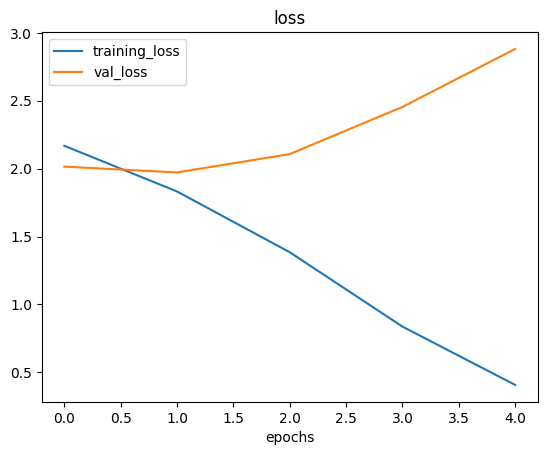

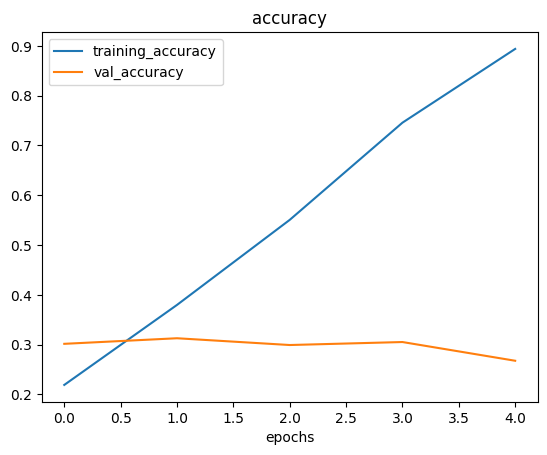

In [ ]:
# Check out the loss curves of model_11
plot_loss_curves(history_11)

Looks like our "simplifying the model" experiment didn't work... the accuracy does not improve very much and overfitting continued.

How about we try data augmentation??


### Trying to reduce overfitting with data augmentation

Let's try and improve our model's resutls by using augmented training data...

Ideally, we want to:
* Reduce overfitting (get the train and validation loss curves closer)
* Improve validation accuracy

In [ ]:
# Create an augmented data generator instance
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,
                                             zoom_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             horizontal_flip=True)

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                  target_size=(224, 224),
                                                                  batch_size=32,
                                                          class_mode="categorical")


Found 7500 images belonging to 10 classes.


In [ ]:
# Let's create another model but this time we'll fit it on the augmented training dataset
model_12 = tf.keras.models.clone_model(model_10)

# Compile the cloned model (using the same setup as previous models)
model_12.compile(loss="categorical_crossentropy",
                 optimizer=Adam(),
                 metrics=["accuracy"])

In [ ]:
model_12.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_21 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 110, 110, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_23 (Conv2D)          (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 53, 53, 10)       0         
 g2D)                                                 

In [ ]:
# Fit the model
history_12 = model_12.fit(train_data_augmented,
                          epochs=5,
                          steps_per_epoch=len(train_data_augmented),
                          validation_data = test_data,
                          validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 150s 624ms/step - loss: 2.2104 - accuracy: 0.1807 - val_loss: 2.0586 - val_accuracy: 0.2488
Epoch 2/5
235/235 [==============================] - 140s 598ms/step - loss: 2.0995 - accuracy: 0.2459 - val_loss: 2.0395 - val_accuracy: 0.2360
Epoch 3/5
235/235 [==============================] - 140s 596ms/step - loss: 2.0483 - accuracy: 0.2641 - val_loss: 1.8799 - val_accuracy: 0.3468
Epoch 4/5
235/235 [==============================] - 129s 547ms/step - loss: 1.9875 - accuracy: 0.2993 - val_loss: 1.8547 - val_accuracy: 0.3596
Epoch 5/5
235/235 [==============================] - 128s 545ms/step - loss: 1.9650 - accuracy: 0.3107 - val_loss: 1.7834 - val_accuracy: 0.3868


In [ ]:
model_12.evaluate(test_data)

79/79 [==============================] - 13s 167ms/step - loss: 1.7834 - accuracy: 0.3868


[1.7833853960037231, 0.38679999113082886]

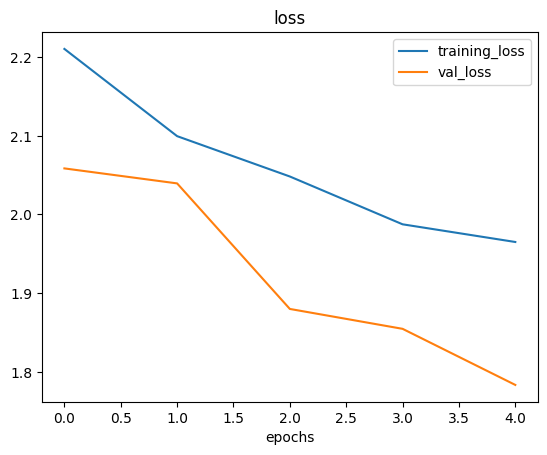

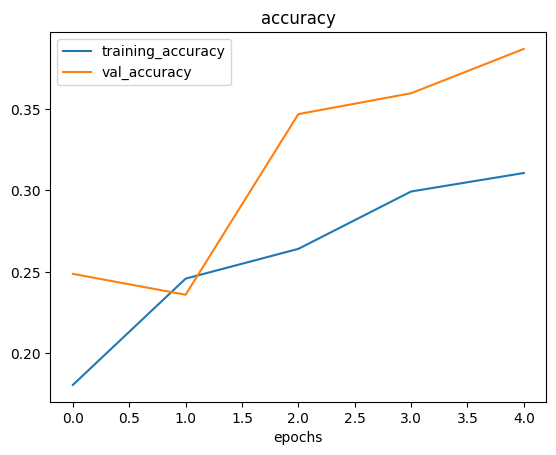

In [ ]:
# Check out our model trained on augmented data's loss curves
plot_loss_curves(history_12)

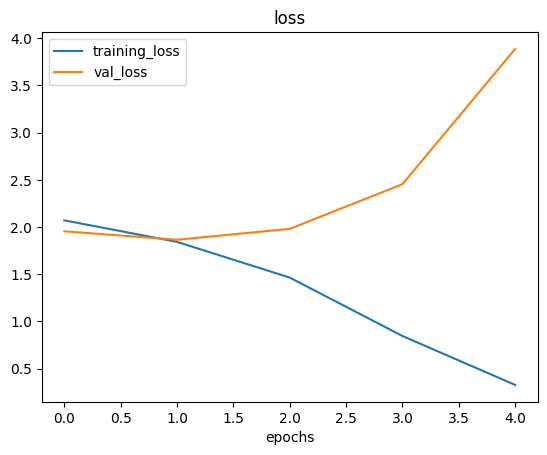

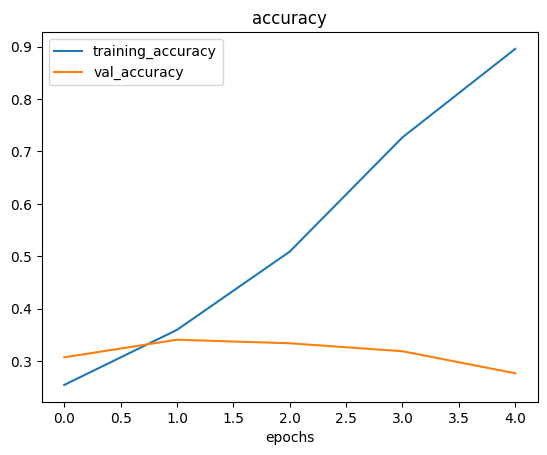

In [ ]:
plot_loss_curves(history_10)

Woah! That looks much better, the loss curves are much closer to each other than the baseline model and they look like they're heading in the right direction (certainly not the wrong direction) so it we were to train for longer, we might see further improvements.

### 7. Repeat until satisfied

We could keep going here... continally trying to bring our loss curves closer together and trying to improve the validation/test accuracy.

How?

By running lots of experiments, namely:
- restructuring our model's architecture (increasing/layers/hidden units)
- adjust the learning rate
- try different methods of data augmentation (adjust the hyperparameters in our ImageDataGenerator instance)
- training for longer (e.g., 10 epochs instead of 5 epochs)
- try **transfer learning**

In [ ]:
# Let's create another model but this time we'll fit it on the augmented training dataset
model_13 = tf.keras.models.clone_model(model_12)

# Compile the cloned model (using the same setup as previous models)
model_13.compile(loss="categorical_crossentropy",
                 optimizer=Adam(),
                 metrics=["accuracy"])

In [ ]:
history_13 = model_13.fit(train_data_augmented,
                          epochs=10,
                          steps_per_epoch=len(train_data_augmented),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/10
235/235 [==============================] - 151s 632ms/step - loss: 2.2314 - accuracy: 0.1677 - val_loss: 2.1432 - val_accuracy: 0.1864
Epoch 2/10
235/235 [==============================] - 169s 721ms/step - loss: 2.1736 - accuracy: 0.2001 - val_loss: 2.1045 - val_accuracy: 0.2452
Epoch 3/10
235/235 [==============================] - 154s 654ms/step - loss: 2.1341 - accuracy: 0.2236 - val_loss: 2.0355 - val_accuracy: 0.2628
Epoch 4/10
235/235 [==============================] - 161s 685ms/step - loss: 2.0895 - accuracy: 0.2505 - val_loss: 1.9639 - val_accuracy: 0.3208
Epoch 5/10
235/235 [==============================] - 142s 605ms/step - loss: 2.0222 - accuracy: 0.2827 - val_loss: 1.9241 - val_accuracy: 0.3212
Epoch 6/10
235/235 [==============================] - 128s 547ms/step - loss: 1.9900 - accuracy: 0.3007 - val_loss: 1.8545 - val_accuracy: 0.3576
Epoch 7/10
235/235 [==============================] - 136s 578ms/step - loss: 1.9403 - accuracy: 0.3297 - val_loss: 1.8288 -

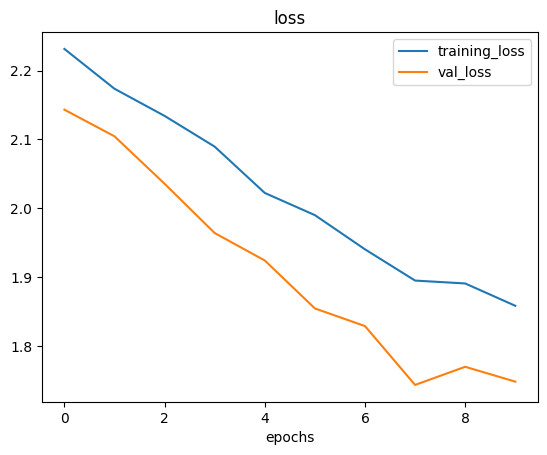

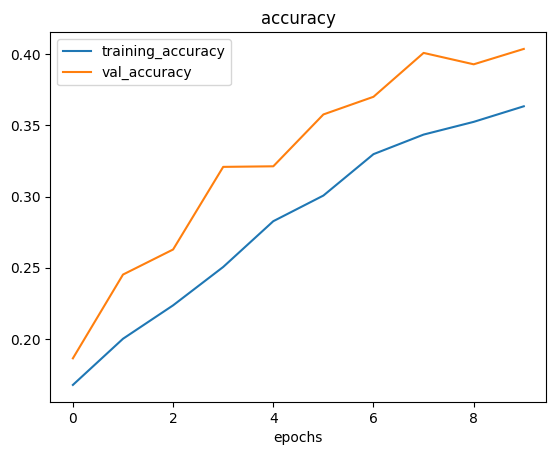

In [ ]:
plot_loss_curves(history_13)

### Making a prediction with our trained model

Let's use our trained model to make some predictions on our own custom images!


In [ ]:
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [ ]:
# Download some custom images
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
!Wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg

--2023-07-05 08:47:23--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg.1’

03-pizza-dad.jpeg.1 100%[===================>]   2.74M  --.-KB/s    in 0.07s   

2023-07-05 08:47:24 (41.4 MB/s) - ‘03-pizza-dad.jpeg.1’ saved [2874848/2874848]

--2023-07-05 08:47:24--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awai

In [ ]:
# Reconfig pred_and_plot function to work with multi-class images
def pred_and_plot_1(model, filename, class_names=class_names):
  """
  Imports an image located at filename, makes a prediction with model
  and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))
  #print(pred)

  # Add in logic for multi-class & get pred_class name
  if len(pred[0]) > 1:
    pred_class  = class_names[tf.argmax(pred[0])]
  else:
    pred_class = class_names[int(tf.round(pred[0]))]


  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

1/1 [==============================] - 0s 58ms/step


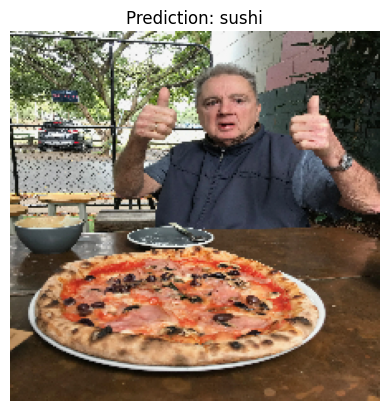

In [ ]:
# Make a prediction using model_12
pred_and_plot_1(model=model_12,
              filename="03-pizza-dad.jpeg",
              class_names=class_names)

1/1 [==============================] - 0s 70ms/step


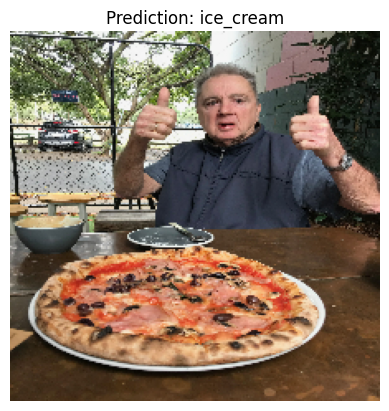

In [ ]:
# Make a prediction using model_12
pred_and_plot_1(model=model_13,
              filename="03-pizza-dad.jpeg",
              class_names=class_names)

Looks like our model didn't perform very well on our custom images but this because it only achieved ~39% accuracy on the test data. So we can expect it to function quite poorly on other unseen data.

### Saving and loading our model

In [ ]:
# Save a model
model_13.save("saved_trained_model_13")

In [ ]:
# Load in a trained model and evaluate it
loaded_model_13 = tf.keras.models.load_model("saved_trained_model_13")
loaded_model_13.evaluate(test_data)

79/79 [==============================] - 21s 270ms/step - loss: 1.7481 - accuracy: 0.4036


[1.7481493949890137, 0.4036000072956085]

In [ ]:
# Compare our loaded model to our existing model
model_13.evaluate(test_data)

79/79 [==============================] - 13s 163ms/step - loss: 1.7481 - accuracy: 0.4036


[1.7481492757797241, 0.4036000072956085]